In [22]:
data_dict = {'email' : '이메일',
# 'date' : '요약 날짜',
# 'check' : '착용 여부 체크',
'nonwear' : '미착용 시간 체크',
'activity_average_met' : '하루간 평균 MET',
'activity_cal_active' : '하루간 활동 칼로리',
'activity_cal_total' : '하루간 총 사용 칼로리',
'activity_class_5min' : '하루간 5분당 활동 로그',
'activity_daily_movement' : '매일 움직인 거리',
'activity_day_end' : '활동 종료 시간',
'activity_day_start' : '활동 시작 시간',
'activity_high' : '고강도 활동 시간',
'activity_inactive' : '비활동 시간',
'activity_inactivity_alerts' : '비활동 알람 횟수',
'active_low' : '저강도 활동 시간',
'activity_medium' : '중강도 활동 시간',
'activity_met_1min' : '하루간 1분 당 MET 로그',
'activity_met_min_high' : '하루간 고강도 활동 MET',
'activity_met_min_inactive' : '하루간 비활동 MET',
'activity_met_min_low' : '하루간 저강도 활동 MET',
'activity_met_min_medium' : '하루간 중강도 활동 MET',
'activity_non_wear' : '미착용 시간',
'activity_rest' : '휴식 시간',
'activity_score' : '활동 점수',
'activity_score_meet_daily_targets' : '활동 목표달성 점수',
'activity_score_move_every_hour' : '매 시간 당 활동유지 점수',
'activity_score_recovery_time' : '회복시간 점수',
'activity_score_stay_active' : '활동 유지 점수',
'activity_score_training_frequency' : '운동 빈도 점수',
'activity_score_training_volume' : '운동 빈도 점수',
'activity_steps' : '매일 걸음 수',
'activity_total' : '활동 총 시간(분)', 
'sleep_awake' : '깬 시간', 
'sleep_bedtime_end' : '잠 종료시간', 
'sleep_bedtime_start' : '잠 시작시간', 
'sleep_breatj_average' : '분단 평균 호흡 수', 
'sleep_deep' : '깊은 수면 시간', 
'sleep_duration' : '잠 시간', 
'sleep_efficiency' : '수면 효율', 
'sleep_hr_5min' : '5분 당 심박동 로그', 
'sleep_hr_average' : '분당 평균 심박동 수', 
'sleep_hr_lowest' : '분당 낮은 심박동 수', 
'sleep_hypnogram_5min' : '수면 상태 로그', 
'sleep_is_longest' : '본 수면 여부', 
'sleep_light' : '가벼운 수면 시간', 
'sleep_midpoint_at_delta' : '수면 중간점 시간 델타', 
'sleep_midpoint_time' : '수면 중간점 시간', 
'sleep_onset_latency' : '수면 잠복 시간', 
'sleep_period_id' : '수면 식별 아이디', 
'sleep_rem' : '램수면 시간', 
'sleep_restless' : '뒤척임 비율', 
'sleep_rmssd' : '평균 심박동변동', 
'sleep_rmssd_5min' : '5분 당 심박동변동 로그', 
'sleep_score' : '수면 종합 점수', 
'sleep_score_alignment' : '수면 시기 점수', 
'sleep_score_deep' : '깊은 수면 점수', 
'sleep_score_disturbances' : '수면 방해 점수', 
'sleep_score_efficiency' : '수면 효율 점수', 
'sleep_score_latency' : '수면 잠복 점수', 
'sleep_score_rem' : '램수면 점수', 
'sleep_score_total' : '수면 시간 기여 점수', 
'sleep_temperature_delta' : '피부 온도 편차', 
'sleep_temperature_deviation' : '피부 온도 편차',
'sleep_temperature_trend_deviation' : '피부 온도 경향 편차',
'timezone' : '시간 장소 정보',
'sleep_total' : '수면 시간'}

In [76]:
import os 
from glob import glob 
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [50]:
raw = pd.read_csv('/Users/sehwan/Desktop/datasets/dementia/data/1.Training/raw/gait/train_activity.csv')
label = pd.read_csv('/Users/sehwan/Desktop/datasets/dementia/data/1.Training/label/gait/training_label.csv')
# df.head()
# raw.iloc[:2, :].T
len(raw), len(label)

(9705, 141)

In [84]:
label[label['SAMPLE_EMAIL'] == 'nia+315@rowan.kr']['DIAG_NM'].values[0]

'CN'

In [88]:
print(len(raw))
raw = pd.merge(raw, label, left_on='EMAIL', right_on='SAMPLE_EMAIL', how='right')
print(len(raw))

9705
9705


In [80]:
label.iloc[:3, :].T

,0,1,2
SAMPLE_EMAIL,nia+315@rowan.kr,nia+014@rowan.kr,nia+220@rowan.kr
DIAG_NM,CN,MCI,CN


In [112]:
raw.isna().sum()

EMAIL                                      0
activity_average_met                       0
activity_cal_active                        0
activity_cal_total                         0
activity_class_5min                        0
activity_daily_movement                    0
activity_day_end                           0
activity_day_start                         0
activity_high                              0
activity_inactive                          0
activity_inactivity_alerts                 0
activity_low                               0
activity_medium                            0
activity_met_1min                          0
activity_met_min_high                      0
activity_met_min_inactive                  0
activity_met_min_low                       0
activity_met_min_medium                    0
activity_non_wear                          0
activity_rest                              0
activity_score                             0
activity_score_meet_daily_targets          0
activity_s

<Axes: >

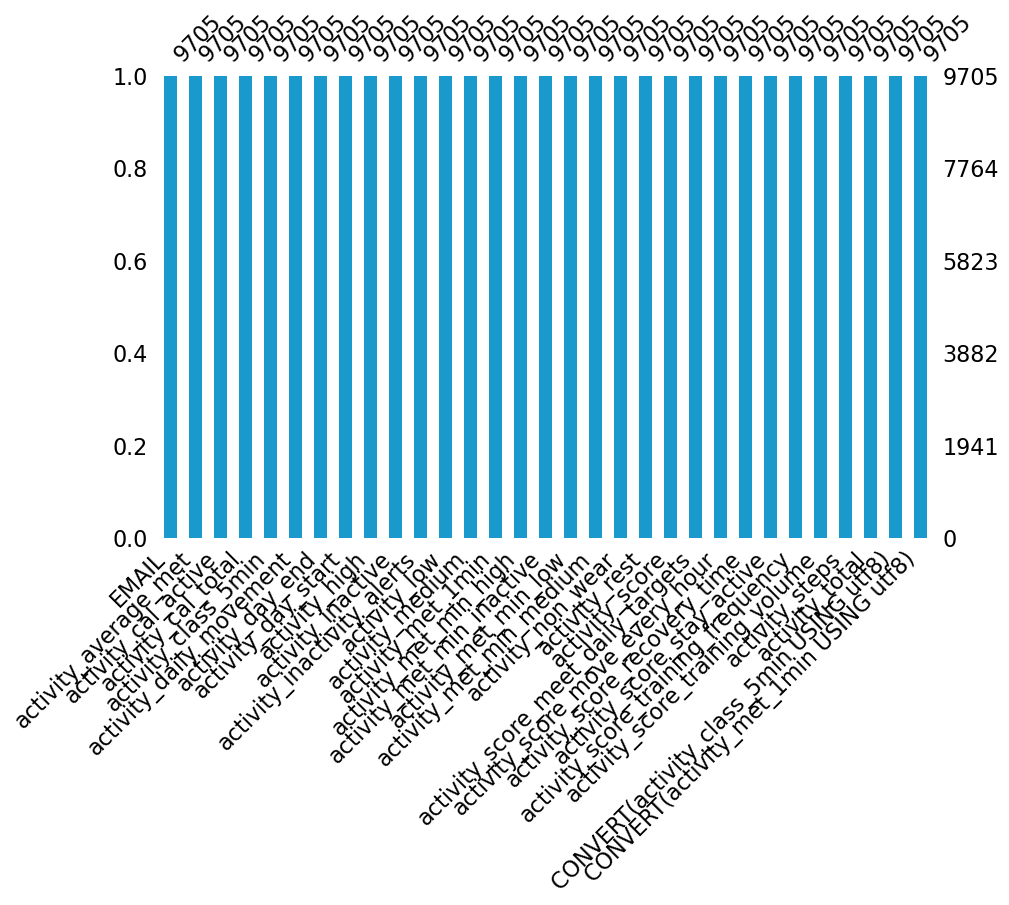

In [13]:
msno.bar(df=raw, color=(0.1, 0.6, 0.8), figsize=(10, 6))

<Axes: ylabel='DIAG_NM'>

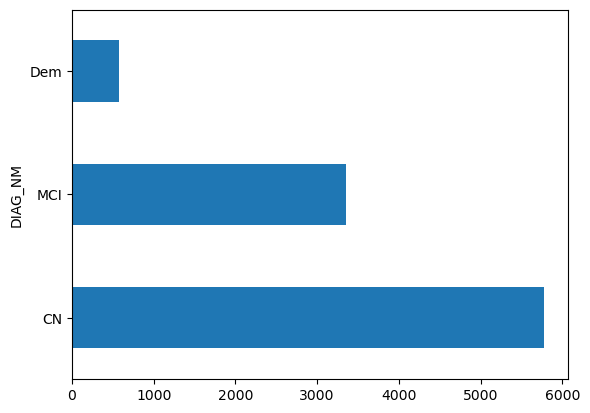

In [92]:
# label.iloc[3, :].T
(
    raw['DIAG_NM']
    .value_counts()
    .plot(kind='barh')
)
# Dem -> 치매
# MCI -> 경도 인지장애
# CN -> 인지 정상 

In [98]:
# raw['date']
raw.iloc[:3, :].T

,0,1,2
EMAIL,nia+315@rowan.kr,nia+315@rowan.kr,nia+315@rowan.kr
activity_average_met,1.71875,1.59375,1.53125
activity_cal_active,796,635,490
activity_cal_total,2948,2777,2636
activity_class_5min,...,...,...
activity_daily_movement,14663,12630,8344
activity_day_end,2020-10-19 03:59:59+09:00,2020-10-20 03:59:59+09:00,2020-10-21 03:59:59+09:00
activity_day_start,2020-10-18 04:00:00+09:00,2020-10-19 04:00:00+09:00,2020-10-20 04:00:00+09:00
activity_high,23,0,2
activity_inactive,614,536,595


In [109]:
def violin(df, col):
    fig = px.violin(df, y=col, x="DIAG_NM", color="DIAG_NM", box=True, template = 'plotly_dark')
    fig.update_layout(autosize=False, width=900, height=500)
    return fig.show()

def kde(df, col):
    grid = sns.FacetGrid(df, hue="DIAG_NM", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

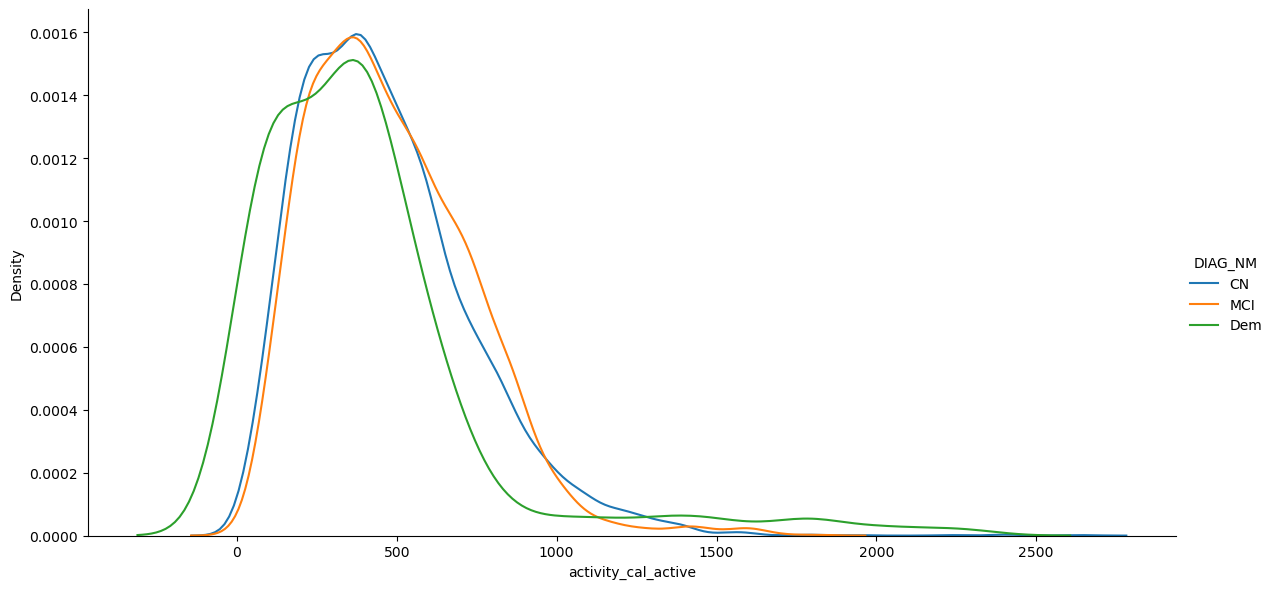

In [110]:
violin(raw, 'activity_cal_active')

kde(raw, 'activity_cal_active')

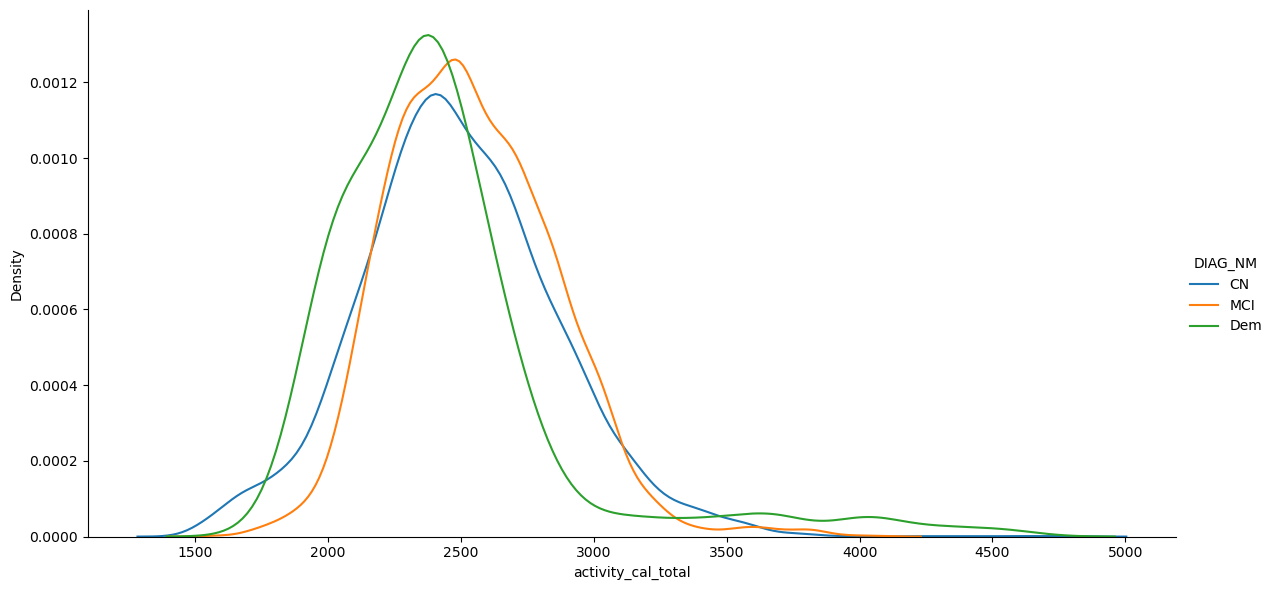

In [113]:
violin(raw, 'activity_cal_total')

kde(raw, 'activity_cal_total')

In [120]:
numerical_features_to_investigate = ['activity_average_met',
'activity_cal_active',
'activity_cal_total',
# 'activity_class_5min',
'activity_daily_movement',
'activity_day_end',
'activity_day_start',
'activity_high',
'activity_inactive',
'activity_inactivity_alerts',
'activity_low',
'activity_medium',
# 'activity_met_1min',
'activity_met_min_high',
'activity_met_min_inactive',
'activity_met_min_low',
'activity_met_min_medium',
'activity_non_wear',
'activity_rest',
'activity_score',
'activity_score_meet_daily_targets',
'activity_score_move_every_hour',
'activity_score_recovery_time',
'activity_score_stay_active',
'activity_score_training_frequency',
'activity_score_training_volume',
'activity_steps',
'activity_total',]

In [123]:
raw['DIAG_NM']

0        CN
1        CN
2        CN
3        CN
4        CN
       ... 
9700    Dem
9701    Dem
9702    Dem
9703    Dem
9704    Dem
Name: DIAG_NM, Length: 9705, dtype: object

In [129]:
raw = (
        raw
        .assign(DIAG_NM_num=lambda x : x['DIAG_NM'].apply(lambda y : 0 if y == 'CN' else 1 if y == 'MCI' else 2))
        # .assign(FraudFound=lambda x : x['DIAG_NM'].apply(lambda y : 1 if y=='Yes' else 0))
    )

In [132]:
(
    pd.concat(
        [
            (
                raw
                .loc[:, numerical_features_to_investigate]
            ),
            (
                raw['DIAG_NM_num']
            ),
        ],
        axis=1
    )
    .corr()
    .style.background_gradient()
)

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_day_end,activity_day_start,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,DIAG_NM_num
activity_average_met,1.000000,0.943381,0.889830,0.938341,-0.122525,-0.122525,0.395323,-0.348111,-0.180579,0.706114,0.788537,0.404573,0.051102,0.745842,0.789248,-0.120811,-0.504414,0.386825,0.538776,0.156770,-0.383648,0.374664,0.412475,0.474789,0.921969,0.863698,-0.046147
activity_cal_active,0.943381,1.000000,0.940283,0.990561,-0.124067,-0.124067,0.415432,-0.438366,-0.202841,0.624215,0.853271,0.436418,-0.106838,0.711960,0.876129,-0.113372,-0.294000,0.401821,0.539493,0.178164,-0.419898,0.477629,0.441742,0.510398,0.970561,0.814754,-0.017377
activity_cal_total,0.889830,0.940283,1.000000,0.902481,-0.144449,-0.144449,0.294934,-0.339059,-0.160756,0.661038,0.713211,0.334039,-0.008140,0.737259,0.762509,-0.117358,-0.363120,0.386795,0.528481,0.137008,-0.367878,0.384562,0.395131,0.482999,0.882927,0.797442,0.018314
activity_daily_movement,0.938341,0.990561,0.902481,1.000000,-0.124370,-0.124370,0.414244,-0.455050,-0.201967,0.614595,0.874052,0.420189,-0.153724,0.720539,0.876797,-0.102473,-0.281502,0.406389,0.536508,0.178162,-0.415007,0.490881,0.445348,0.512412,0.980857,0.812915,-0.024388
activity_day_end,-0.122525,-0.124067,-0.144449,-0.124370,1.000000,1.000000,-0.004866,0.092552,0.034819,-0.161930,-0.069321,-0.002169,-0.046212,-0.172970,-0.062968,-0.040659,0.045060,-0.133363,-0.124511,-0.030175,0.015959,-0.111225,-0.104418,-0.109126,-0.134388,-0.159740,-0.122519
activity_day_start,-0.122525,-0.124067,-0.144449,-0.124370,1.000000,1.000000,-0.004866,0.092552,0.034819,-0.161930,-0.069321,-0.002169,-0.046212,-0.172970,-0.062968,-0.040659,0.045060,-0.133363,-0.124511,-0.030175,0.015959,-0.111225,-0.104418,-0.109126,-0.134388,-0.159740,-0.122519
activity_high,0.395323,0.415432,0.294934,0.414244,-0.004866,-0.004866,1.000000,-0.141866,-0.048440,0.089666,0.349231,0.952205,-0.077613,0.098369,0.296219,-0.055172,-0.058560,0.097435,0.160252,0.040837,-0.220067,0.140388,0.203596,0.202207,0.347994,0.229616,-0.048799
activity_inactive,-0.348111,-0.438366,-0.339059,-0.455050,0.092552,0.092552,-0.141866,1.000000,0.469525,-0.386088,-0.345485,-0.142266,0.353684,-0.437975,-0.331777,-0.207314,-0.332058,-0.359225,-0.289626,-0.407025,0.205524,-0.932683,-0.231469,-0.276559,-0.450571,-0.442426,-0.105624
activity_inactivity_alerts,-0.180579,-0.202841,-0.160756,-0.201967,0.034819,0.034819,-0.048440,0.469525,1.000000,-0.270952,-0.154862,-0.040974,-0.034269,-0.230176,-0.142196,-0.061215,-0.138006,-0.257677,-0.191188,-0.889646,0.089731,-0.490569,-0.104531,-0.123071,-0.215832,-0.281118,-0.097640
activity_low,0.706114,0.624215,0.661038,0.614595,-0.161930,-0.161930,0.089666,-0.386088,-0.270952,1.000000,0.300708,0.078236,0.264602,0.927808,0.280263,-0.158454,-0.444975,0.379479,0.455616,0.230422,-0.188161,0.438599,0.242084,0.308793,0.624367,0.949826,-0.013292


In [142]:
# !pip install pycaret==3.0.0rc4
# !pip install 
# !pip install pyod
# from pyod.models.auto_encoder import AutoEncoder

In [37]:
# 활동시간
raw['activity_day_start'], raw['activity_day_end']

(0       2020-10-19T04:00:00+09:00
 1       2020-10-20T04:00:00+09:00
 2       2020-10-21T04:00:00+09:00
 3       2020-10-22T04:00:00+09:00
 4       2020-10-23T04:00:00+09:00
                   ...            
 9700    2020-12-24T04:00:00+09:00
 9701    2020-12-26T04:00:00+09:00
 9702    2020-12-27T04:00:00+09:00
 9703    2020-12-28T04:00:00+09:00
 9704    2020-12-29T04:00:00+09:00
 Name: activity_day_start, Length: 9705, dtype: object,
 0       2020-10-20T03:59:59+09:00
 1       2020-10-21T03:59:59+09:00
 2       2020-10-22T03:59:59+09:00
 3       2020-10-23T03:59:59+09:00
 4       2020-10-24T03:59:59+09:00
                   ...            
 9700    2020-12-25T03:59:59+09:00
 9701    2020-12-27T03:59:59+09:00
 9702    2020-12-28T03:59:59+09:00
 9703    2020-12-29T03:59:59+09:00
 9704    2020-12-30T03:59:59+09:00
 Name: activity_day_end, Length: 9705, dtype: object)

In [54]:
raw = (
   raw
   .assign(activity_day_start=lambda x : pd.to_datetime(x['activity_day_start']))
   .assign(activity_day_end=lambda x : pd.to_datetime(x['activity_day_end']))
   .assign(activity_day_time=lambda x : x['activity_day_end'] - x['activity_day_start'])
)
# raw.loc[:['activity_day_start', 'activity_day_end', 'activity_day_time']]

In [55]:
raw.loc[:, ['activity_day_start', 'activity_day_end', 'activity_day_time']]

,activity_day_start,activity_day_end,activity_day_time
0,2020-10-19 04:00:00+09:00,2020-10-20 03:59:59+09:00,0 days 23:59:59
1,2020-10-20 04:00:00+09:00,2020-10-21 03:59:59+09:00,0 days 23:59:59
2,2020-10-21 04:00:00+09:00,2020-10-22 03:59:59+09:00,0 days 23:59:59
3,2020-10-22 04:00:00+09:00,2020-10-23 03:59:59+09:00,0 days 23:59:59
4,2020-10-23 04:00:00+09:00,2020-10-24 03:59:59+09:00,0 days 23:59:59
...,...,...,...
9700,2020-12-24 04:00:00+09:00,2020-12-25 03:59:59+09:00,0 days 23:59:59
9701,2020-12-26 04:00:00+09:00,2020-12-27 03:59:59+09:00,0 days 23:59:59
9702,2020-12-27 04:00:00+09:00,2020-12-28 03:59:59+09:00,0 days 23:59:59
9703,2020-12-28 04:00:00+09:00,2020-12-29 03:59:59+09:00,0 days 23:59:59


In [70]:
import plotly.express as px

raw_plot = (
    raw
    ['activity_day_time'].dt.days.astype(int)
    .value_counts()
    .to_frame() 
    .reset_index(drop=False)
    # .rename(columns={'activity_day_time' : 'activity_day_time', 'activity_day_time' : 'Count'})
)
# raw_plot
fig = px.bar(
    raw_plot, 
    x = 'activity_day_time',
    y = 'count'
)

fig.update_layout(
    title=dict(
        text=f'하루 행동시간',
        font=dict(size=25)
    ),
    xaxis_title=dict(
        text=f'activity_day_time',
        font=dict(size=25)
    ),
    yaxis_title=dict(
        text=f'count',
        font=dict(size=25)
    )
)
fig.show() 
display(raw_plot)

,activity_day_time,count
0,0,9705


<Axes: xlabel='activity_cal_active', ylabel='Count'>

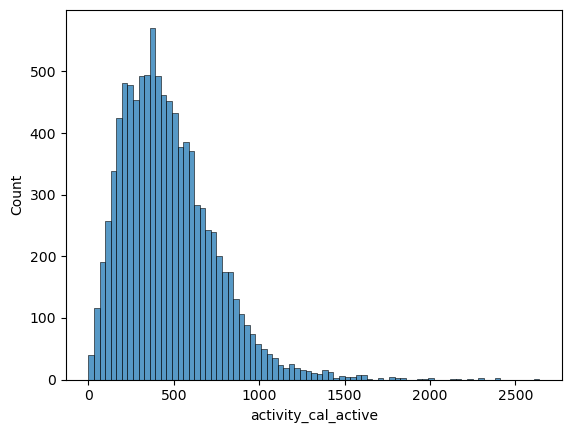

In [90]:
# sns.histplot(raw['activity_cal_active'])